Импорт необходимых библиотек.

In [581]:
import numpy as np
import pandas as pd
import math as mh
import random as rd
import tensorflow as tf

import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['figure.figsize'] = (12,12)
from mpl_toolkits.mplot3d import Axes3D

# Построение и обучение линейной сети с задержками, которая будет выполнять одношаговый прогноз для первой функции

Первая функция задания.

In [582]:
def x(t):
    return mh.sin(-2*t**2 + 7*t)

Проектировка сети. Она будет содержать один скрытый слой. Размерность входных выборок (количество входов сети) и число нейронов задается. В данной лабораторной работе достаточно одного нейрона.

In [583]:
class Net(object):
    def __init__(self, dim, neurons):
        self.layers = 1
        self.neurons = neurons
        if neurons > 1:
            self.weights = np.array([[rd.random() for i in range(dim)] for j in range(neurons)]).transpose()
            self.beta = np.array([rd.random() for i in range(neurons)])
        else:
            self.weights = np.array([rd.random() for i in range(dim)]).transpose()
            self.beta = rd.random()
    def show(self):
        print("The network consists of:")
        print("\t ", self.layers, "hidden layer with ", self.neurons, " neuron(s).")
        print("Weights: ")
        print(self.weights)
        print("Beta: ")
        print(self.beta)

Задание параметров сети, ее построение и отображение структуры. Начальные весовые коэффициенты и оступы инициализируются рандомными значениями.

In [584]:
d = 5
neurons = 1
net = Net(d, neurons)
net.show()

The network consists of:
	  1 hidden layer with  1  neuron(s).
Weights: 
[0.87573707 0.33120292 0.34555109 0.82867713 0.33958557]
Beta: 
0.674050042828788


Формирование обучающей выборки.

Для этого необходимо найти значения временной последовательности $x(n)$ на заданном интервале $[a, b]$ и затем сформировать множество подпоследовательностей длины $d$, где $d$ - глубина погружения временного ряда. Каждая следующая подпоследовательность образована единичным сдвигом текущей вправо и отличается от нее на один элемент. Так, мы получим множество образцов. 

Для формирования эталонных выходов сети возьмем элементы последовательности, начиная с $d+1$-го и до $N-$го, чтобы сеть выполняла одношаговый прогноз.

Функция генерации входного множества сигналов.

In [585]:
def seq_gen(I):
    P = np.array([x(i) for i in I])
    return P

Функция формирования образцов обучащего множества.

In [586]:
def batch(signals, d, step):
    P = np.array([signals[i:i + d] for i in range(len(signals) - d - step + 1)])
    return P

Задание параметров, формирование обучающего множества и эталонных выходов сети.

In [587]:
h = 0.025
a, b = 0, 5
N = int((b - a)/h + 1)
I = [i * h for i in range(N)]

signals = seq_gen(I)
P = batch(signals, d, neurons)
T = np.array([t for t in signals[d:]])

Функция ошибки - средняя квадратичная.

In [588]:
def loss(T, out):
    loss = 0
    for t, o in zip(T, out):
        loss += (t - o)**2
    return loss**0.5

Функция обучения сети с числом эпох равным 50 и коэффициентом обучения 0.01.

In [589]:
def train(self, P, T):
    epochs = 50
    learning_rate = 0.01
    
    for i in range(epochs):
        for p, t in zip(P, T):
            out = p.dot(self.weights) + self.beta
            e = t - out
            if e == 0:
                continue
            self.weights += np.dot(p.transpose(), e) * learning_rate;
            self.beta += e * learning_rate
    return 1

Функция предсказания сети.

In [590]:
def predict(self, P):
    out = np.array([ p.dot(self.weights) + self.beta for p in P])
    return out

Обучение сети, поиск величины ошибки обучения.

In [591]:
if( train(net, P, T)):
    print("The model is trained!")

out = predict(net, P)
print("Ошибка обучения MSE: ", loss(T, out))

The model is trained!
Ошибка обучения MSE:  1.1176677476316939


Отображение на графике эталонных значений и значений, предсказанных сетью.

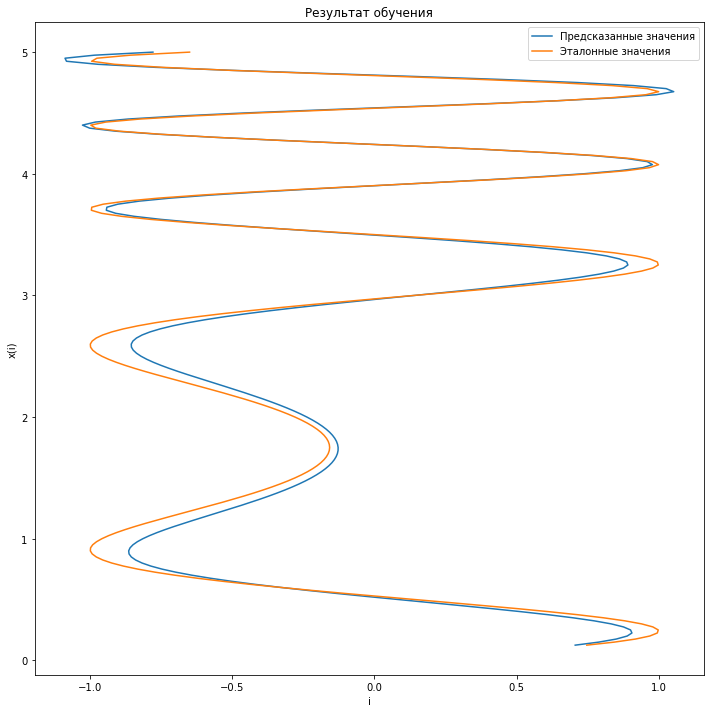

In [592]:
plt.plot(out, I[d:N])
plt.plot(T, I[d:N])
plt.title('Результат обучения')
plt.ylabel('x(i)')
plt.xlabel('i')
plt.legend(['Предсказанные значения', 'Эталонные значения'], loc='upper right')
plt.show()

# Построение и обучение линейной сети с задержками, которая будет выполнять многошаговый прогноз для первой функции

Задание параметров сети.

Сконструируем сеть, которая будет предсказывать значение сигналана на 2 шага. Для этого сконструируем сеть с двумя нейронами. Зададим значение задержек от 1 до 3.

In [593]:
d = 3
neurons = 2
net2 = Net(d, neurons)
net2.show()

The network consists of:
	  1 hidden layer with  2  neuron(s).
Weights: 
[[0.19191113 0.79975053]
 [0.96493921 0.55524676]
 [0.43891069 0.95370092]]
Beta: 
[0.32146207 0.60438597]


Задание параметров, обучающего множества и эталонных выходов.

In [594]:
I = [i * h for i in range(N)]
signals = seq_gen(I)

P2 = batch(signals, d, neurons)
if neurons == 1:
    T2 = np.array([t for t in signals[d:]])
else:
    T2 = np.array([signals[i:i + neurons] for i in range(d, N - neurons + 1)])

Т.к. выходы сети будут многомерными, будем искать погрешноть обучения следующим образом - сначала вычтем из матрицы эталонных значений матрицу полученных значений, позведем в квадрат каждый элемент полученной матрицы, просуммируем по оси $Y,$ т.е. получим некоторый вектор размерность $1 x neurons$, просуммируем элементы этого вектора и возьмум квадратный корень от полученного значения.

In [595]:
def multi_loss(out, T):
    return np.sum(np.sum((T - out)**2, axis=1))**0.5

In [596]:
def multi_train(self, P, T, neurons):
    epochs = 600
    learning_rate = 0.01
    eps = 0.1e-6
    mse = 1
    mses = []
    
    for i in range(epochs):
        if mse <= eps:
            break
        for p, t in zip(P, T):
            out = p.dot(self.weights) + self.beta
            e = t - out
            if e.all() == 0:
                continue
            self.weights += np.array([[ i * j for j in e] for i in p]) * learning_rate;
            self.beta += e * learning_rate
        mse = multi_loss(predict(self, P), T)
        mses.append(mse)
    return mse,mses

In [597]:
mse2, mses = multi_train(net2, P2, T2, neurons)
print("The model is trained!")

out2 = predict(net2, P2)
print("Ошибка обучения MSE: ", multi_loss(T2, out2))

The model is trained!
Ошибка обучения MSE:  1.332407111504212


Зафиксируем полученные весовые коэффициенты и смещения.

net2.show()

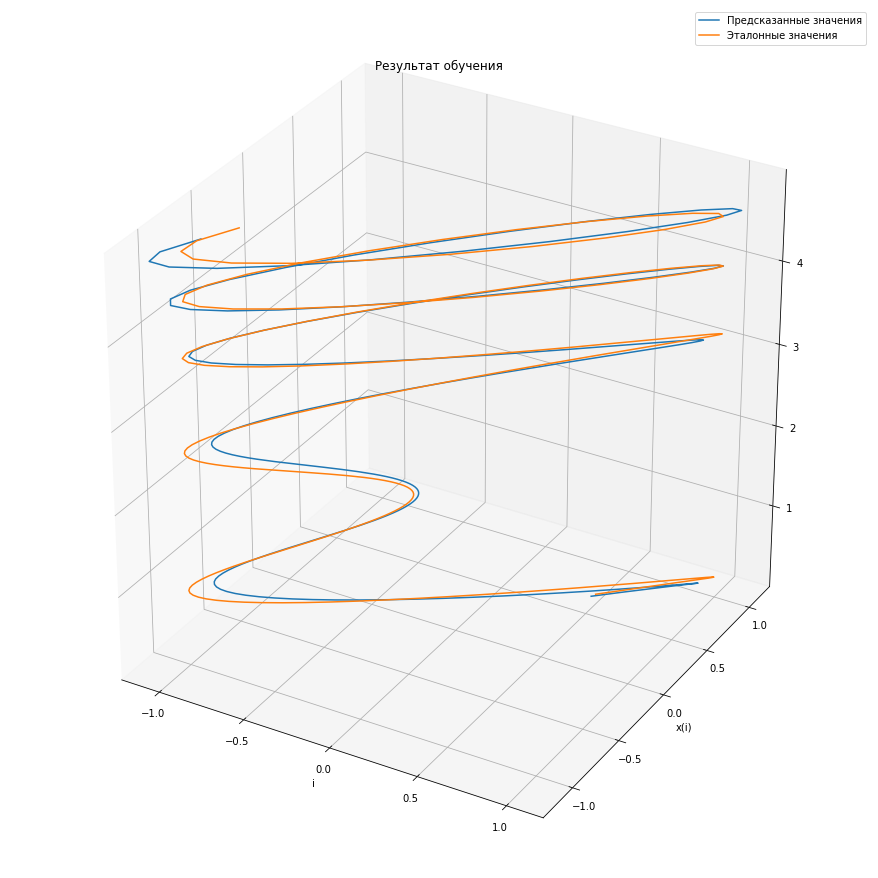

In [598]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot(out2[:,0], out2[:,1], I[d:N - neurons + 1])
ax.plot(T2[:,0], T2[:,1], I[d:N - neurons + 1])
#plt.plot(out[0], out[1], I[d:N - neurons + 1])
#plt.plot(np.sum(T**2, axis=1)**0.5, I[d:N - neurons + 1])
plt.title('Результат обучения')
plt.ylabel('x(i)')
plt.xlabel('i')
plt.legend(['Предсказанные значения', 'Эталонные значения'], loc='upper right')
plt.show()

Визуализация изменения величины ошибки в процессе обучения.

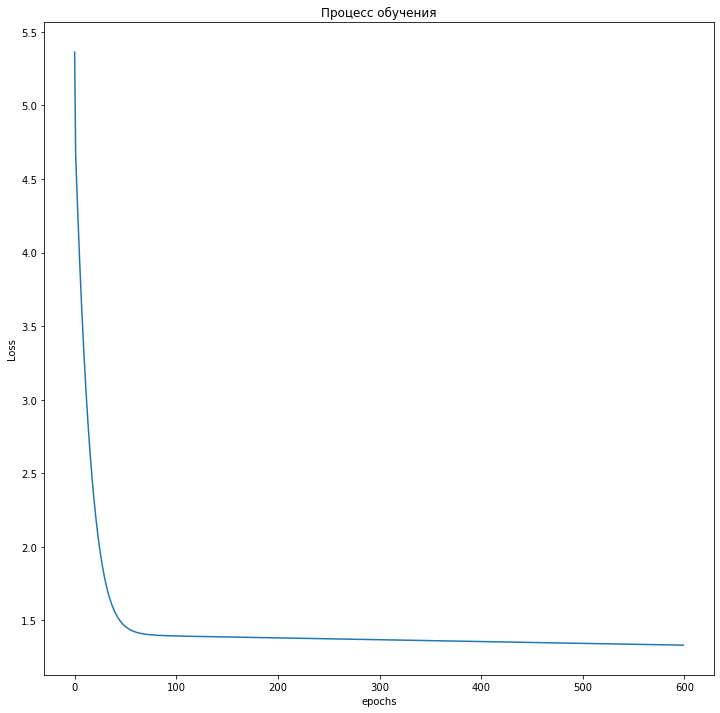

In [599]:
plt.plot(np.array(mses))
plt.title('Процесс обучения')
plt.ylabel('Loss')
plt.xlabel('epochs')
plt.show()

Сформируем новый набор данных для тестирования сети. Добавим во временную последовательность 20 новых значений.

In [600]:
np_count = 20
for i in range(N, N + np_count):
    I.append(i * h)
signals = seq_gen(I)

P2 = batch(signals, d, neurons)
if neurons == 1:
    T2 = np.array([t for t in signals[d:]])
else:
    T2 = np.array([signals[i:i + neurons] for i in range(d, N + np_count - neurons + 1)])

Тестирование и получение ошибки обучения.

In [601]:
out2 = predict(net2, P2)
print("Ошибка обучения MSE: ", multi_loss(T2, out2))

Ошибка обучения MSE:  1.632184964418052


Визуализация.

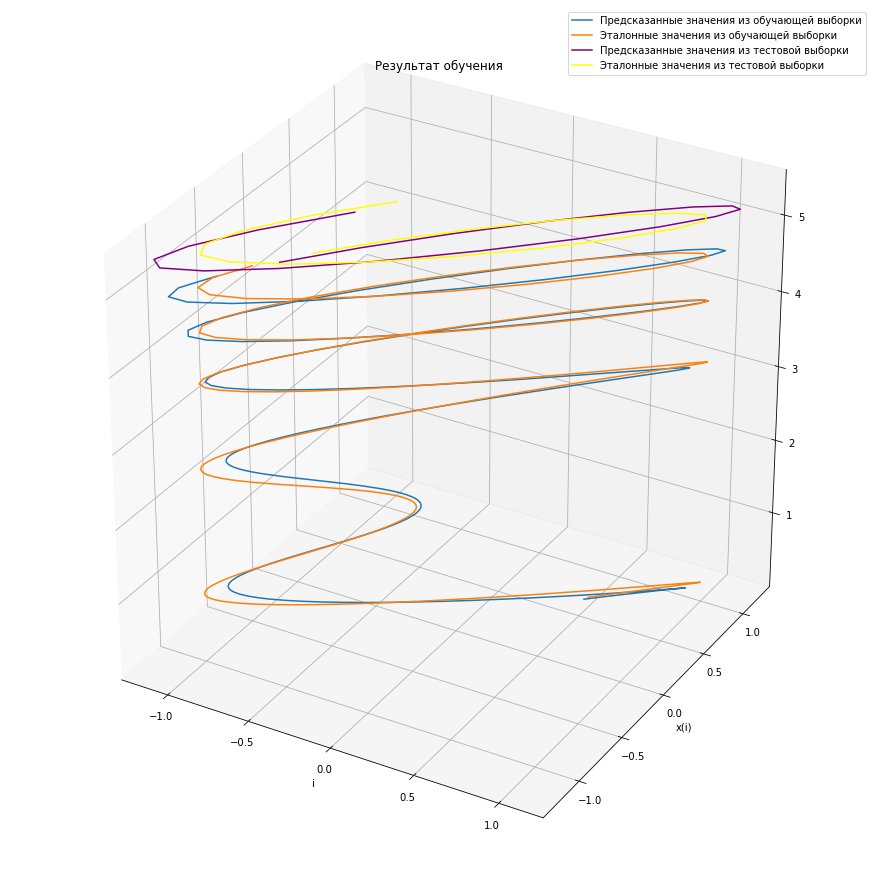

In [602]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot(out2[: N - d - neurons + 1,0], out2[: N - d - neurons + 1,1], I[d:N - neurons + 1])
ax.plot(T2[: N - d - neurons + 1,0], T2[: N - d - neurons + 1,1], I[d:N - neurons + 1])
ax.plot(out2[N - d - neurons + 1:,0], out2[N - d - neurons + 1:,1], I[N - neurons + 1:N + np_count - neurons + 1], color='purple')
ax.plot(T2[N - d - neurons + 1:,0], T2[N - d - neurons + 1:,1], I[N - neurons + 1:N + np_count - neurons + 1], color='yellow')

plt.title('Результат обучения')
plt.ylabel('x(i)')
plt.xlabel('i')
plt.legend(['Предсказанные значения из обучающей выборки', 'Эталонные значения из обучающей выборки', 'Предсказанные значения из тестовой выборки', 'Эталонные значения из тестовой выборки'], loc='upper right')
plt.show()

# Построение и обучение линейной сети, которая является адаптивным линейным фильтром

Зададим глубину погружения временного ряда равной 3.

In [603]:
d = 4
neurons = 1
net3 = Net(d, neurons)
net3.show()

The network consists of:
	  1 hidden layer with  1  neuron(s).
Weights: 
[0.01680863 0.15525271 0.68616813 0.33124087]
Beta: 
0.19621662428204445


Введем вторую функцию, соответствующую второму входному сигналу.

In [604]:
def x_2(t):
    return mh.sin(2.5 * t**2 - 5 * t)

Введем функцию, соответсвующую выходному сигналу.

In [605]:
def y(t):
    return mh.sin(2.5 * t**2 - 5 * t + 4 * mh.pi ) / 3

Задание параметров, построение обучающего множества, эталонных выходов сети.

In [606]:
def seq_gen2(I):
    In, Out = [],[]
    for i in I:
        In.append(x_2(i))
        Out.append(y(i))
    return In, Out

In [607]:
h = 0.01
a, b = 0, 2.2
N = int((b - a)/h + 1)
I = [i * h for i in range(N)]

in_signals, out_signals = seq_gen2(I)

P3 = batch(in_signals, d, neurons)
T3 = np.array([t for t in out_signals[d:]])

Обучение сети.

In [608]:
if( train(net3, P3, T3)):
    print("The model is trained!")

out3 = predict(net3, P3)
print("Ошибка обучения MSE: ", loss(T3, out3))

The model is trained!
Ошибка обучения MSE:  0.059857041163913945


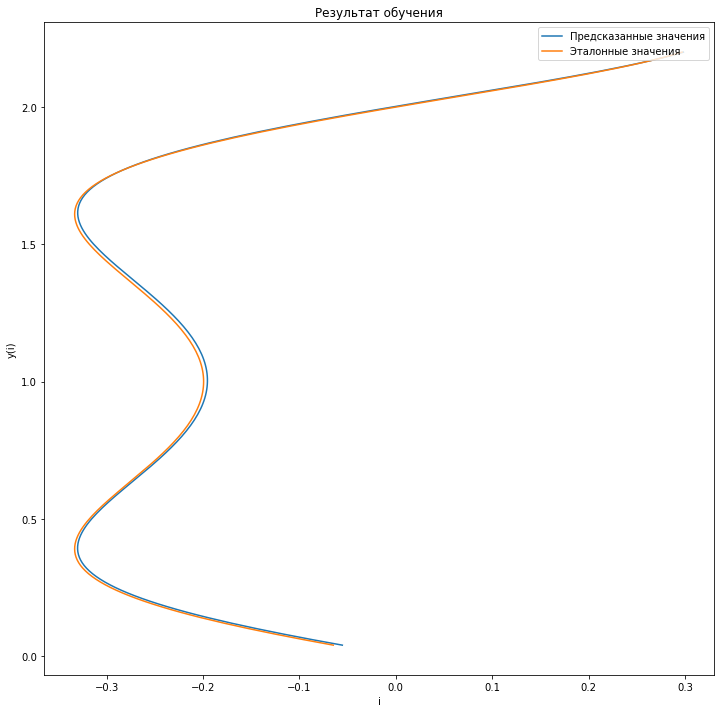

In [609]:
plt.plot(out3, I[d:N])
plt.plot(T3, I[d:N])
plt.title('Результат обучения')
plt.ylabel('y(i)')
plt.xlabel('i')
plt.legend(['Предсказанные значения', 'Эталонные значения'], loc='upper right')
plt.show()

Чтобы протестировать сеть, добавим к тестирующему множеству еще 20 значений.

In [610]:
np_count = 20
for i in range(N, N + np_count):
    I.append(i * h)
in_signals, out_signals = seq_gen2(I)

P3 = batch(in_signals, d, neurons)
T3 = np.array([t for t in out_signals[d:]])

In [611]:
out3 = predict(net3, P3)
print("Ошибка обучения MSE: ", loss(T3, out3))

Ошибка обучения MSE:  0.07073222427575736


Визуализация работы на тестовой выборке.

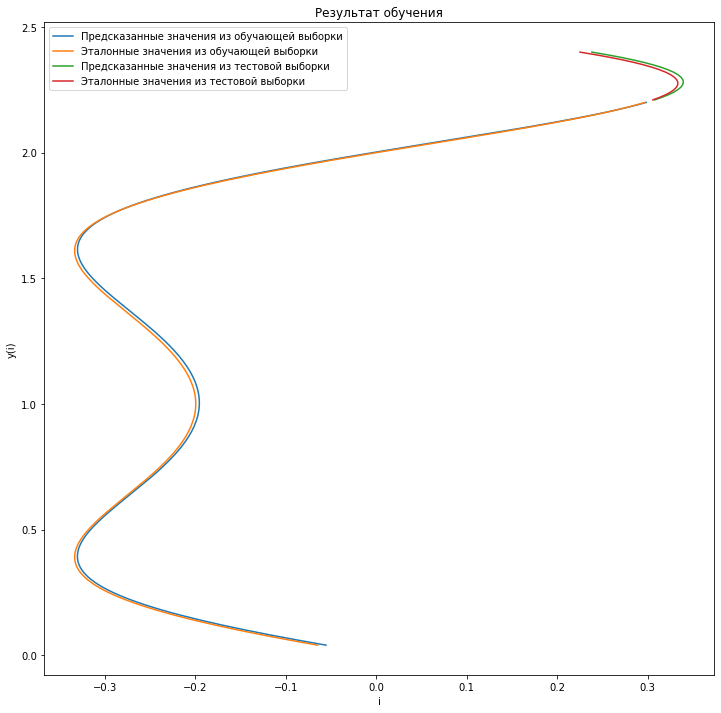

In [612]:
plt.plot(out3[: N - d - neurons + 1], I[d:N - neurons + 1])
plt.plot(T3[: N - d - neurons + 1], I[d:N - neurons + 1])
plt.plot(out3[N - d - neurons + 1:], I[N - neurons + 1:N + np_count - neurons + 1])
plt.plot(T3[N - d - neurons + 1:], I[N - neurons + 1:N + np_count - neurons + 1])
plt.title('Результат обучения')
plt.ylabel('y(i)')
plt.xlabel('i')
plt.legend(['Предсказанные значения из обучающей выборки', 'Эталонные значения из обучающей выборки', 'Предсказанные значения из тестовой выборки', 'Эталонные значения из тестовой выборки'], loc='upper left')
plt.show()